# Load Data and Libraries


In [42]:
import pandas as pd
import numpy as np
from sklearn.compose import make_column_transformer, make_column_selector
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn import set_config
set_config(display='diagram')

In [43]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [44]:
df_original = pd.read_csv('/content/drive/MyDrive/Data Sets for Coding Dojo/Boston_Housing_from_Sklearn.csv')
df = df_original.copy()
df.head()

,CRIM,NOX,RM,AGE,PTRATIO,LSTAT,PRICE
0,0.00632,0.538,6.575,65.2,15.3,4.98,24.0
1,0.02731,0.469,6.421,78.9,17.8,9.14,21.6
2,0.02729,0.469,7.185,61.1,17.8,4.03,34.7
3,0.03237,0.458,6.998,45.8,18.7,2.94,33.4
4,0.06905,0.458,7.147,54.2,18.7,5.33,36.2


# Data Dictionary

CRIM per capita crime rate by town

NOX nitric oxides concentration (parts per 10 million)

RM average number of rooms per dwelling

AGE proportion of owner-occupied units built prior to 1940

PTRATIO pupil-teacher ratio by town

LSTAT % lower economic status of the population

PRICE Median value of owner-occupied homes in $1000's

# Explore Data

- According to the Learning Platform, there is no need to clean the data set and it can be used "as is"
- It also informs me that all features and the target variable are continuous

In [45]:
# Multiply 'PRICE' column by 1000 since data is expressed in 1000s

df['PRICE'] = df['PRICE'] * 1000
df.head()

,CRIM,NOX,RM,AGE,PTRATIO,LSTAT,PRICE
0,0.00632,0.538,6.575,65.2,15.3,4.98,24000.0
1,0.02731,0.469,6.421,78.9,17.8,9.14,21600.0
2,0.02729,0.469,7.185,61.1,17.8,4.03,34700.0
3,0.03237,0.458,6.998,45.8,18.7,2.94,33400.0
4,0.06905,0.458,7.147,54.2,18.7,5.33,36200.0


## Heatmap

- Identify 3 features using a heatmap that are most correlated to **PRICE**

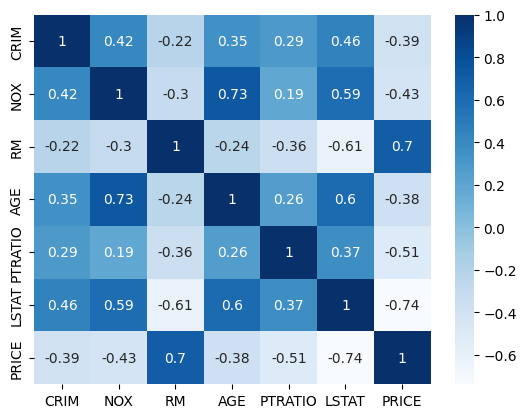

In [58]:
import seaborn as sns

corr = df.corr()
sns.heatmap(corr, cmap='Blues', annot=True);

- **RM** is strongly positively correlated with **PRICE**
  - As the average number of rooms go up, so does price
- **PTRATIO** is moderately negatively correlated with **PRICE**
  - As the ratio of pupils to teachers gets higher (more pupils per teacher), the price gets lower
- **LSTAT** is strongly negatively correlated with **PRICE**
  - As the percentage of lower economic status goes up, price goes down

# Preprocessing

## Split Validation

In [47]:
X = df[['RM', 'PTRATIO', 'LSTAT']].copy()
y = df['PRICE'].copy()

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

## Instantiate and Fit Model with Pipeline

In [48]:
scaler = StandardScaler()
lin_reg = LinearRegression()

lin_reg_pipe = make_pipeline(scaler, lin_reg)

lin_reg_pipe.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('linearregression', LinearRegression())])

## Model Predictions for Training and Testing Data

In [49]:
train_predict = lin_reg_pipe.predict(X_train)
test_predict = lin_reg_pipe.predict(X_test)

## Evaluate Model

### R-Squared

In [50]:
train_r2 = r2_score(y_train, train_predict)
test_r2 = r2_score(y_test, test_predict)

print(f'Model Training R2: {train_r2}')
print(f'Model Testing R2: {test_r2}')

Model Training R2: 0.6877966145058926
Model Testing R2: 0.6331590458194678


- We can see that the "Training Model" is showing a higher R2 score than the "Testing Model"
  - Could be because the "Training Model" has more data to work with

### Mean Absolute Error (MAE)

In [51]:
train_MAE = mean_absolute_error(y_train, train_predict)
test_MAE = mean_absolute_error(y_test, test_predict)

print(f'Model Training MAE: {train_MAE}')
print(f'Model Testing MAE: {test_MAE}')

Model Training MAE: 3714.054057158005
Model Testing MAE: 3391.8448293813963


- We can see that the "Training Model" shows a higher error than the "Testing Data"
  - \$3,714 vs \$3,391

In [55]:
MAE_percent_train = (train_MAE / df['PRICE'].mean()) * 100
MAE_percent_test = (test_MAE / df['PRICE'].mean()) * 100
print(f'Percent of error for Training Model: {MAE_percent_train}')
print(f'Percent of error for Testing Model: {MAE_percent_test}')

Percent of error for Training Model: 16.48287392051949
Percent of error for Testing Model: 15.052917868255214


### Mean Squared Error (MSE)

In [56]:
train_MSE = mean_squared_error(y_train, train_predict)
test_MSE = mean_squared_error(y_test, test_predict)

print(f'Model Training MSE: {train_MSE}')
print(f'Model Testing MSE: {test_MSE}')

Model Training MSE: 27686736.81796949
Model Testing MSE: 25688824.19667596


### Root Mean Squared Error (RMSE)


In [57]:
train_RMSE = np.sqrt(train_MSE)
test_RMSE = np.sqrt(test_MSE)

print(f'Model Training RMSE: {train_RMSE}')
print(f'Model Testing RMSE: {test_RMSE}')

Model Training RMSE: 5261.8187747174925
Model Testing RMSE: 5068.414367104959


### Evaluation

- Seems that our model might not be the best since the RMSE is higher than MAE
  - Implies that our model is less consistant and is swayed significantly by outliers (larger errors)

In [63]:
print(f'The Training Model RMSE ({round(train_RMSE, 2)}) is {round(train_RMSE - train_MAE, 2)} higher than the MAE ({round(train_MAE, 2)})')
print(f'The Testing Model RMSE ({round(test_RMSE, 2)}) is {round(test_RMSE - test_MAE, 2)} higher than the MAE ({round(test_MAE, 2)})')

The Training Model RMSE (5261.82) is 1547.76 higher than the MAE (3714.05)
The Testing Model RMSE (5068.41) is 1676.57 higher than the MAE (3391.84)
